In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os

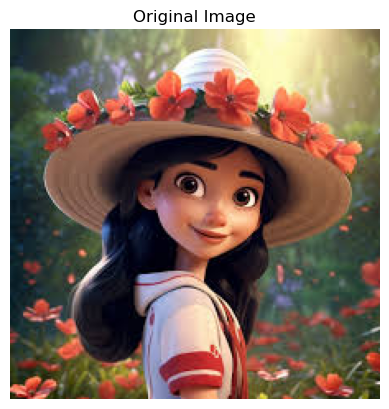

In [2]:
# Path dyal image
image_path = "images/sample.jfif"

# Load image
image = Image.open(image_path)
image = image.convert("RGB")  # nضمنو RGB

# Nعرضوها
plt.imshow(image)
plt.axis("off")
plt.title("Original Image")
plt.show()


In [3]:
# Convert image to numpy array
img_array = np.array(image)
h, w, c = img_array.shape
print("Image shape:", img_array.shape)

# Reshape → (num_pixels, 3)
pixels = img_array.reshape(-1, 3)
print("Pixels shape:", pixels.shape)


Image shape: (225, 225, 3)
Pixels shape: (50625, 3)


In [4]:
# Nombre d couleurs li bghina
k = 5  # تقدري تبدليه (3, 5, 8...)

kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(pixels)

# كل pixel خذا label من 0 حتى k-1
labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_  # هادو الألوان الأساسية

print("Cluster centers (colors):")
print(cluster_centers.astype(int))


Cluster centers (colors):
[[156  83  64]
 [ 20  22  30]
 [178 140 115]
 [ 74  77  62]
 [230 213 185]]


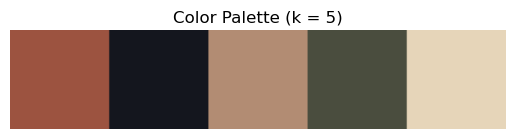

In [5]:
def plot_color_palette(cluster_centers):
    # cluster_centers: (k, 3)
    palette = cluster_centers.astype(int)

    # نوجد صورة صغيرة فيها k أشرطة ديال الألوان
    palette_img = np.zeros((50, 50 * len(palette), 3), dtype=np.uint8)

    for i, color in enumerate(palette):
        palette_img[:, i*50:(i+1)*50, :] = color

    plt.imshow(palette_img)
    plt.axis("off")
    plt.title("Color Palette (k = {})".format(len(palette)))
    plt.show()

plot_color_palette(cluster_centers)


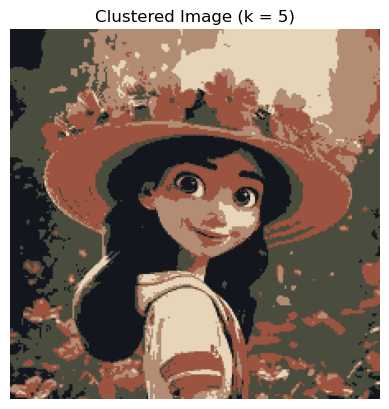

In [7]:
# نعوض كل pixel باللون ديال cluster center ديالو
new_pixels = cluster_centers[labels].astype(np.uint8)

# نرجعو للصورة الأصلية shape (h, w, 3)
clustered_img = new_pixels.reshape(h, w, 3)

plt.imshow(clustered_img)
plt.axis("off")
plt.title("Clustered Image (k = {})".format(k))
plt.show()


In [8]:
os.makedirs("results", exist_ok=True)

# Save original
Image.fromarray(img_array).save("results/original_image.png")

# Save clustered image
Image.fromarray(clustered_img).save(f"results/clustered_image_k{k}.png")

# Save palette
# نعاود نستعمل function باش ترجع الimage بلا ما نplot
def get_palette_image(cluster_centers):
    palette = cluster_centers.astype(int)
    palette_img = np.zeros((50, 50 * len(palette), 3), dtype=np.uint8)
    for i, color in enumerate(palette):
        palette_img[:, i*50:(i+1)*50, :] = color
    return palette_img

palette_img = get_palette_image(cluster_centers)
Image.fromarray(palette_img).save(f"results/color_palette_k{k}.png")
